## Load the data

In [78]:

import pandas as pd         
#from pathlib import Path   part of standard library https://pypi.org/project/pathlib/

In [3]:
data_dir='C:/Users/Clara_einfach/Clara/Tilburg/Master/Code/Dataset/WISDM'

In [79]:
                                                                                        #name columns for two locations
accel_columns = ['user', 'activity', 'timestamp', 'accel_x', 'accel_y', 'accel_z']
gyro_columns = ['user', 'activity', 'timestamp', 'gyro_x', 'gyro_y', 'gyro_z']

                                                                                        #function to looop over files in directory
def load_files_from_directories(dirs):
    all_files = []
    for directory in dirs:
        path = Path(directory)
        all_files.extend(path.glob('*'))                                                # Load all files in the directory
    return all_files

                                                                                        #call locations and files
directories = [data_dir+'/accel', data_dir+'/gyro']
files = load_files_from_directories(directories)

                                                                                        #list for the dataframes
accel_dfs = []
gyro_dfs = []

                                                                                        #fill dataframes
for idx, directory in enumerate(directories):
    for file in Path(directory).glob('*'):
        if idx == 0:                                                                    # For accelerometer files
            df = pd.read_table(file, sep=',', header=None, names=accel_columns)
            accel_dfs.append(df)
        elif idx == 1:                                                                  # For gyroscope files
            df = pd.read_table(file, sep=',', header=None, names=gyro_columns)
            gyro_dfs.append(df)

                                                                                        #combine files for two dataframes each
full_accel_data = pd.concat(accel_dfs, ignore_index=True)
full_gyro_data = pd.concat(gyro_dfs, ignore_index=True)

                                                                                        #how long are the file?
print("shape file full accel data",full_accel_data.shape)
print("shape file full gyro data ",full_gyro_data.shape)

                                                                                        #merge to one on user, activity and timestamp
merged_data = pd.merge(full_accel_data, full_gyro_data, on=['user', 'activity', 'timestamp'], how='inner')

                                                                                        #check how many of the files could be matched:
matched_rows_count = merged_data.shape[0]
print(f"Number of matched rows: {matched_rows_count}")


                                                                                        #name final columns
final_columns = ['user',  'activity','timestamp', 'accel_x', 'accel_y', 'accel_z', 'gyro_x', 'gyro_y', 'gyro_z']
merged_data = merged_data[final_columns]

print(merged_data)

shape file full accel data (4804403, 6)
shape file full gyro data  (3608635, 6)
Number of matched rows: 2909149
         user activity        timestamp   accel_x    accel_y       accel_z  \
0        1600        A  252207918580802 -4.332779  13.361191   -0.7188721;   
1        1600        A  252207968934806 -0.319443  13.318359  -0.23202515;   
2        1600        A  252208019288809  1.566452   9.515274  -0.01777649;   
3        1600        A  252208069642813 -0.323746   5.262665   0.32234192;   
4        1600        A  252208119996817 -1.811676   3.710510    1.3739319;   
...       ...      ...              ...       ...        ...           ...   
2909144  1650        S  357733977635000 -8.509504  -3.520679   -1.8226099;   
2909145  1650        S  357734017925000 -8.423284  -4.061953   -1.7603394;   
2909146  1650        S  357734058325000 -8.327483  -4.196074   -1.5711329;   
2909147  1650        S  357734098619000 -8.080796  -4.418811   -1.4154567;   
2909148  1650        S  357734

In [5]:
                                                                                        #check matched files
total_accel_rows = full_accel_data.shape[0]
total_gyro_rows = full_gyro_data.shape[0]

                                                                                        # Number of matched rows
matched_rows_count = merged_data.shape[0]

                                                                                        # Calculate the percentage of matched rows based on full accel data
matched_percentage_accel = (matched_rows_count / total_accel_rows) * 100 

                                                                                        #  Calculate the percentage of matched rows based on full gyro data
matched_percentage_gyro = (matched_rows_count / total_gyro_rows) * 100 
                                                                                        # print 
print(f"Total rows in accelerometer data: {total_accel_rows}")
print(f"Total rows in gyroscope data: {total_gyro_rows}")
print(f"Matched rows count: {matched_rows_count}")
print(f"Percentage of matched rows for accelerometer data: {matched_percentage_accel:.2f}%")
print(f"Percentage of matched rows for gyroscope data: {matched_percentage_gyro:.2f}%")

Total rows in accelerometer data: 4804403
Total rows in gyroscope data: 3608635
Matched rows count: 2909149
Percentage of matched rows for accelerometer data: 60.55%
Percentage of matched rows for gyroscope data: 80.62%


#checking the files

In [6]:
                                                                       #counting the files for participants

count=0
for idx, directory in enumerate(directories):
    for file in Path(directory).glob('*'):

      count=count+1                                                    #checking the amount of files: 51gyro+51accel
print(count)
                                                                       #short check of different users
print(merged_data['user'].unique())                                    #merged 51



102
[1600 1601 1602 1603 1604 1605 1606 1607 1608 1609 1610 1611 1612 1613
 1614 1615 1616 1617 1618 1619 1620 1621 1622 1623 1624 1625 1626 1627
 1628 1629 1630 1631 1632 1633 1634 1635 1636 1637 1638 1639 1640 1641
 1642 1643 1644 1645 1646 1647 1648 1649 1650]


## selected activites from the dataset

In [7]:
                                                                        #select activities (walking, running, stairs, sitting, standing, kicking)
merged_data.info()
move6=merged_data[merged_data['activity'].isin(['A','B','C','D','E','M'])]
move6.info()                                                            #print type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2909149 entries, 0 to 2909148
Data columns (total 9 columns):
 #   Column     Dtype  
---  ------     -----  
 0   user       int64  
 1   activity   object 
 2   timestamp  int64  
 3   accel_x    float64
 4   accel_y    float64
 5   accel_z    object 
 6   gyro_x     float64
 7   gyro_y     float64
 8   gyro_z     object 
dtypes: float64(4), int64(2), object(3)
memory usage: 199.8+ MB
<class 'pandas.core.frame.DataFrame'>
Index: 962598 entries, 0 to 2899401
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   user       962598 non-null  int64  
 1   activity   962598 non-null  object 
 2   timestamp  962598 non-null  int64  
 3   accel_x    962598 non-null  float64
 4   accel_y    962598 non-null  float64
 5   accel_z    962598 non-null  object 
 6   gyro_x     962598 non-null  float64
 7   gyro_y     962598 non-null  float64
 8   gyro_z     962598 non-null  object 
dty

# z_axis from object to float

In [8]:
                                                                                # the last column was separated with ; and will be removed 
move6['accel_z'] = move6['accel_z'].map(lambda x: x.rstrip(';'))
move6['accel_z'] = move6['accel_z'].astype(float)                               #and datatype transformed to float like other time series
move6['gyro_z'] = move6['gyro_z'].map(lambda x: x.rstrip(';'))
move6['gyro_z'] = move6['gyro_z'].astype(float)
move6.info()

C:\Users\Clara_einfach\AppData\Local\Temp\ipykernel_4456\1694462143.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  move6['accel_z'] = move6['accel_z'].map(lambda x: x.rstrip(';'))
C:\Users\Clara_einfach\AppData\Local\Temp\ipykernel_4456\1694462143.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  move6['accel_z'] = move6['accel_z'].astype(float)                               #and datatype transformed to float like other time series
C:\Users\Clara_einfach\AppData\Local\Temp\ipykernel_4456\1694462143.p

<class 'pandas.core.frame.DataFrame'>
Index: 962598 entries, 0 to 2899401
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   user       962598 non-null  int64  
 1   activity   962598 non-null  object 
 2   timestamp  962598 non-null  int64  
 3   accel_x    962598 non-null  float64
 4   accel_y    962598 non-null  float64
 5   accel_z    962598 non-null  float64
 6   gyro_x     962598 non-null  float64
 7   gyro_y     962598 non-null  float64
 8   gyro_z     962598 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 73.4+ MB


C:\Users\Clara_einfach\AppData\Local\Temp\ipykernel_4456\1694462143.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  move6['gyro_z'] = move6['gyro_z'].astype(float)


## training test split

In [9]:
                                                                #packages
from sklearn.model_selection import train_test_split

import numpy as np

In [10]:
                                                                #three dataframes
train_data = pd.DataFrame()
val_data = pd.DataFrame()
test_data = pd.DataFrame()

                                                                #iterate through users
for user in move6['user'].unique():
    user_data = move6[merged_data['user'] == user]

                                                                #iterate through activities for each user
    for activity in user_data['activity'].unique():
        activity_data = user_data[user_data['activity'] == activity]

                                                                #sorted by timestamp (important to keep sorted order for ts)
        activity_data = activity_data.sort_values(by='timestamp')

                                                                #calculate split index per person per activity
        train_index= int(len(activity_data)*0.6)
        val_index= int(len(activity_data)*0.8)

                                                                #split data by index
        train_split= activity_data.iloc[:train_index]
        val_split = activity_data.iloc[train_index:val_index]
        test_split = activity_data.iloc[val_index:]

                                                                #append to train, validation and test dataframes
        train_data = pd.concat([train_data, train_split], ignore_index=True)
        val_data = pd.concat([val_data,val_split],ignore_index=True)
        test_data = pd.concat([test_data, test_split], ignore_index=True)
                                                                #print overview
print("Training Data:")
print(train_data.head())
print("Validation Data:")
print(val_data.head())
print("Testing Data:")
print(test_data.head())

C:\Users\Clara_einfach\AppData\Local\Temp\ipykernel_4456\247271673.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  user_data = move6[merged_data['user'] == user]
C:\Users\Clara_einfach\AppData\Local\Temp\ipykernel_4456\247271673.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  user_data = move6[merged_data['user'] == user]
C:\Users\Clara_einfach\AppData\Local\Temp\ipykernel_4456\247271673.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  user_data = move6[merged_data['user'] == user]
C:\Users\Clara_einfach\AppData\Local\Temp\ipykernel_4456\247271673.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  user_data = move6[merged_data['user'] == user]
C:\Users\Clara_einfach\AppData\Local\Temp\ipykernel_4456\247271673.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  user_data = move6[merged_data['user'] == user]
C:\Users\C

Training Data:
   user activity        timestamp   accel_x    accel_y   accel_z    gyro_x  \
0  1600        A  252207918580802 -4.332779  13.361191 -0.718872 -0.853210   
1  1600        A  252207968934806 -0.319443  13.318359 -0.232025 -0.875137   
2  1600        A  252208019288809  1.566452   9.515274 -0.017776 -0.720169   
3  1600        A  252208069642813 -0.323746   5.262665  0.322342 -0.571640   
4  1600        A  252208119996817 -1.811676   3.710510  1.373932 -0.380493   

     gyro_y    gyro_z  
0  0.297226  0.890182  
1  0.015472  0.162231  
2  0.388489 -0.284012  
3  1.227402 -0.241669  
4  1.202835 -0.213135  
Validation Data:
   user activity        timestamp   accel_x    accel_y   accel_z    gyro_x  \
0  1600        A  252315726504993 -1.022568  10.587906 -0.038254  0.483643   
1  1600        A  252315776858997 -4.283859  12.623840 -4.597519  0.093338   
2  1600        A  252315827213001 -6.712646  10.446396 -1.323807 -0.825363   
3  1600        A  252315877567005 -2.404923

In [11]:
print(len(train_data))      #Number of values for the sets
print(len(val_data))
print(len(test_data))

577452
192541
192605


## visualize

In [12]:
import matplotlib.pyplot as plt                     #packages

# visualization of training test split

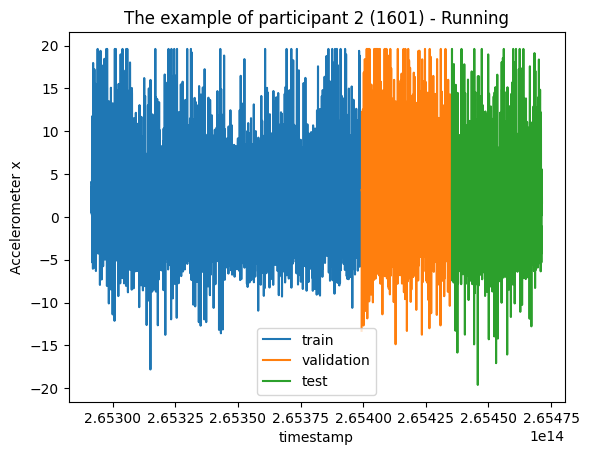

In [69]:
                                                                                            # data sample for one activity and one participant for three parts of the same ts
filteredtrain=train_data[(train_data['activity']=='B')&(train_data['user']==1601)]
filteredval=val_data[(val_data['activity']=='B')&(val_data['user']==1601)]
filteredtest=test_data[(test_data['activity']=='B')&(test_data['user']==1601)]
                                                                                            # plot accelerometer data on timestamp 
plt.plot(filteredtrain['timestamp'],filteredtrain['accel_x'],label='train')
plt.plot(filteredval['timestamp'], filteredval['accel_x'], label='validation')
plt.plot(filteredtest['timestamp'],filteredtest['accel_x'],label='test')
plt.legend()
plt.title("The example of participant 2 (1601) - Running")
plt.xlabel("timestamp")
plt.ylabel("Accelerometer x")
plt.show()

# visualize 
A=Walking, B=jogging, C=Stairs, D=Sitting, E=Standing, M=kicking

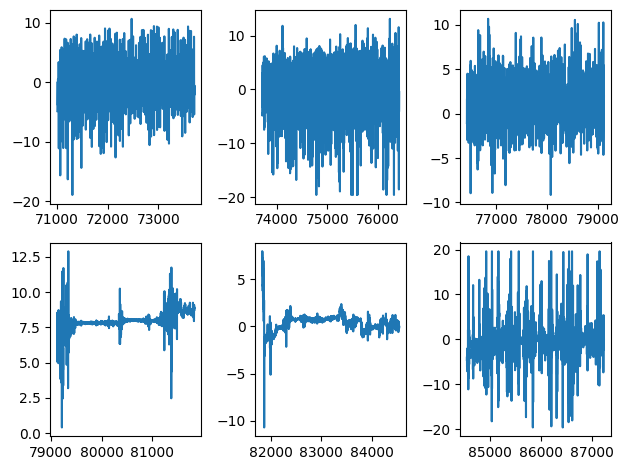

In [14]:
                                                                #visualize activities with example accelerometer x train data for one participant (nr2) 1601

fig,ax=plt.subplots(2,3)
ax=ax.flatten()
activities= train_data['activity'].unique()                     # 
for i, activity in enumerate(activities):                       # loop over activities to make a graph for each
                                                                #filter data for user
  filtered=train_data[(train_data['activity']==activity)&(train_data['user']==1605)]
                                                                
  ax[i].plot(filtered.index,filtered['accel_x'] )               

plt.tight_layout()
plt.show()


 

C:\Users\Clara_einfach\AppData\Local\Temp\ipykernel_4456\1067225747.py:3: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


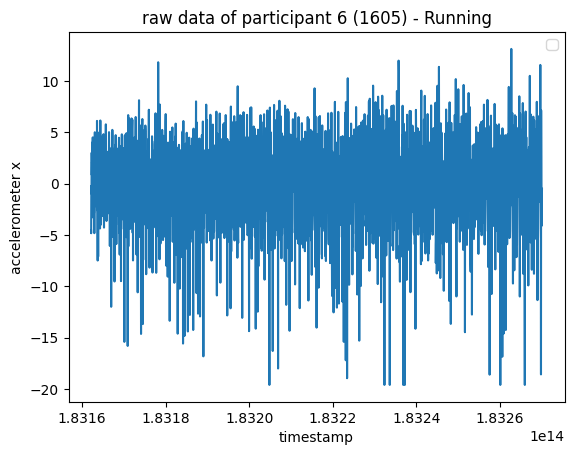

In [68]:
filteredtrain=train_data[(train_data['activity']=='B')&(train_data['user']==1605)]
plt.plot(filteredtrain['timestamp'],filteredtrain['accel_x'])
plt.legend()
plt.title("raw data of participant 6 (1605) - Running")
plt.xlabel("timestamp")
plt.ylabel("accelerometer x")
plt.show()

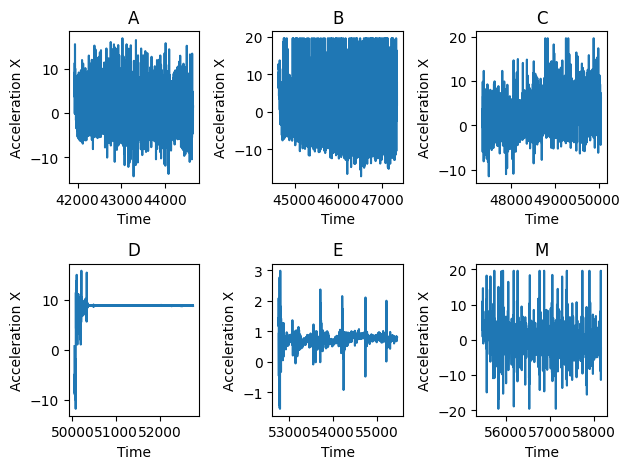

In [16]:

label_names = ['Walking', 'Running', 'Stairs', 'Sitting', 'Standing', 'Kicking']
fig, ax = plt.subplots(2, 3)
ax = ax.flatten()
activities = train_data['activity'].unique()  # Get unique activities

for i, activity in enumerate(activities):  # Loop over activities to make a graph for each
    filtered = train_data[(train_data['activity'] == activity) & (train_data['user'] == 1603)]
    ax[i].plot(filtered.index, filtered['accel_x'])  # Plot the data
    ax[i].set_title(activity)  # Set activity label as title for the subplot
    ax[i].set_xlabel('Time')  # Optional: Add x-axis label
    ax[i].set_ylabel('Acceleration X')  # Optional: Add y-axis label

plt.tight_layout()
plt.show()

## check missings

In [17]:

missi=train_data.isna().sum()
print(missi)

user         0
activity     0
timestamp    0
accel_x      0
accel_y      0
accel_z      0
gyro_x       0
gyro_y       0
gyro_z       0
dtype: int64


In [18]:
                                                                                # copy of dataframe for next step
train_norm = train_data.copy()
val_norm = val_data.copy()
test_norm = test_data.copy()

## Features

In [19]:
coordinates = ['accel_x','accel_y','accel_z','gyro_x','gyro_y','gyro_z']         # name of columns with raw data

In [20]:
                                                                                # mean of windows over accel x,y,z, gyro x,y,z for train,val and test data
for dat in coordinates:                                                         # loop over all raw time series
  train_norm[f'{dat}_mean_rol']=train_norm[dat].rolling(window=120).mean()      # rolling mean for training data
  val_norm[f'{dat}_mean_rol']=val_norm[dat].rolling(window=120).mean()          # rolling mean for validation data  
  test_norm[f'{dat}_mean_rol']=test_norm[dat].rolling(window=120).mean()        # rolling mean for test data

In [21]:
                                                                                # standard deviation of windows over accel x,y,z, gyro x,y,z for train,val and test data
for dat in coordinates:
  train_norm[f'{dat}_std_rol']=train_norm[dat].rolling(window=120).std()
  val_norm[f'{dat}_std_rol']=val_norm[dat].rolling(window=120).std()
  test_norm[f'{dat}_std_rol']=test_norm[dat].rolling(window=120).std()

In [22]:
#checking the amount of variables 3 + 6 + 6 + 6 = 21 (descriptives, x,y,z,x,y,z, mean x,y,z,x,y,z, std x,y,z,x,y,z)
print(train_norm.shape)             # yes

(577452, 21)


In [23]:
                            # variance
for dat in coordinates:
  train_norm[f'{dat}_var_rol']=train_norm[dat].rolling(window=120).var()
  val_norm[f'{dat}_var_rol']=val_norm[dat].rolling(window=120).var()
  test_norm[f'{dat}_var_rol']=test_norm[dat].rolling(window=120).var()

In [24]:
                           # skewness 
for dat in coordinates:
  train_norm[f'{dat}_skew_rol']=train_norm[dat].rolling(window=120).skew()
  val_norm[f'{dat}_skew_rol']=val_norm[dat].rolling(window=120).skew()
  test_norm[f'{dat}_skew_rol']=test_norm[dat].rolling(window=120).skew()

In [25]:
                          # kurtosis 

for dat in coordinates:
  train_norm[f'{dat}_kurt_rol']=train_norm[dat].rolling(window=120).kurt()
  val_norm[f'{dat}_kurt_rol']=val_norm[dat].rolling(window=120).kurt()
  test_norm[f'{dat}_kurt_rol']=test_norm[dat].rolling(window=120).kurt()

In [26]:
                          # Root Mean Square of windows 

for dat in coordinates:
  train_norm[f'{dat}_rms_rol']=np.sqrt(train_norm[dat].pow(2).rolling(window=120).mean())
  val_norm[f'{dat}_rms_rol']=np.sqrt(val_norm[dat].pow(2).rolling(window=120).mean())
  test_norm[f'{dat}_rms_rol']=np.sqrt(test_norm[dat].pow(2).rolling(window=120).mean())


 Fast Fourier Transform for Energy and Entropy


In [27]:
def spectral_energy(time_series):                             #Bao
    
    fft = np.fft.fft(time_series)                                                      
    power_spectrum = np.abs(fft)**2                               # Compute the power spectrum
    power_spectrum_normalized = power_spectrum / len(time_series) # Normalize the power spectrum
    spectral_energy_value = np.sum(power_spectrum_normalized)     # Compute the spectral energy value (sum ofr normalized power spectrum
    return spectral_energy_value

window_size = 120  

for dat in coordinates:                                                           # calculate function (Spectral Entropy) over the time series
  train_norm[f'{dat}_SpecEne_rol'] = train_norm[dat].rolling(window=window_size).apply(lambda x: spectral_energy(x.values), raw=False) # for trainings data
  val_norm[f'{dat}_SpecEne_rol'] = val_norm[dat].rolling(window=window_size).apply(lambda x: spectral_energy(x.values), raw=False)     # for validation data
  test_norm[f'{dat}_SpecEne_rol'] = test_norm[dat].rolling(window=window_size).apply(lambda x: spectral_energy(x.values), raw=False)

In [28]:
print("Rolling Spectral Energy:")                                                # short overview over Spectral Energy
print(train_norm['accel_x_SpecEne_rol'].describe())

Rolling Spectral Energy:
count    577333.000000
mean       3732.755384
std        4022.977758
min           0.641408
25%         866.921788
50%        2121.877707
75%        5031.663827
max       41779.890488
Name: accel_x_SpecEne_rol, dtype: float64


In [29]:
                                                                                  # Spectral Entropy with .rolling()
def spectral_entropy(time_series):                                                # a function for: 
                                                                                  
    fft = np.fft.fft(time_series)                                                 # Compute Power Spectrum
    power_spectrum = np.abs(fft)**2                          
    power_spectrum_normalized = power_spectrum / np.sum(power_spectrum)           # Normalize Power Spectrum
                                                                                  # Compute Spectral Entropy  (negative sum of normalized power spectrum multiplied by the logarithm of the normalized powerspectrum)
    spectral_entropy_value = -np.sum(power_spectrum_normalized[power_spectrum_normalized > 0] * np.log2(power_spectrum_normalized[power_spectrum_normalized > 0]))
    return spectral_entropy_value

                                                                                  
window_size = 120                                                                 # set size rolling window 

for dat in coordinates:                                                           # calculate function (Spectral Entropy) over the time series
  train_norm[f'{dat}_SpecEnt_rol'] = train_norm[dat].rolling(window=window_size).apply(lambda x: spectral_entropy(x.values), raw=False) # for trainings data
  val_norm[f'{dat}_SpecEnt_rol'] = val_norm[dat].rolling(window=window_size).apply(lambda x: spectral_entropy(x.values), raw=False)     # for validation data
  test_norm[f'{dat}_SpecEnt_rol'] = test_norm[dat].rolling(window=window_size).apply(lambda x: spectral_entropy(x.values), raw=False)

In [30]:
print("Rolling Spectral Entropy:")                                                # short overview over Spectral Entropy
print(train_norm['accel_x_SpecEnt_rol'].describe())

Rolling Spectral Entropy:
count    577333.000000
mean          2.678056
std           2.271702
min           0.000015
25%           0.104579
50%           2.704012
75%           4.929329
max           6.678196
Name: accel_x_SpecEnt_rol, dtype: float64


# Scaling features 


In [31]:
from sklearn.preprocessing import MinMaxScaler

In [32]:
train_without_objects = train_norm.copy()                           # make a df for all non descriptives and label 

                                                                    # Drop the specified columns
without_objects = train_without_objects.drop(columns=['user', 'activity', 'timestamp'])
floatfeatures=without_objects.columns.tolist()
                                                                    # Display the modified DataFrame
print(floatfeatures)

['accel_x', 'accel_y', 'accel_z', 'gyro_x', 'gyro_y', 'gyro_z', 'accel_x_mean_rol', 'accel_y_mean_rol', 'accel_z_mean_rol', 'gyro_x_mean_rol', 'gyro_y_mean_rol', 'gyro_z_mean_rol', 'accel_x_std_rol', 'accel_y_std_rol', 'accel_z_std_rol', 'gyro_x_std_rol', 'gyro_y_std_rol', 'gyro_z_std_rol', 'accel_x_var_rol', 'accel_y_var_rol', 'accel_z_var_rol', 'gyro_x_var_rol', 'gyro_y_var_rol', 'gyro_z_var_rol', 'accel_x_skew_rol', 'accel_y_skew_rol', 'accel_z_skew_rol', 'gyro_x_skew_rol', 'gyro_y_skew_rol', 'gyro_z_skew_rol', 'accel_x_kurt_rol', 'accel_y_kurt_rol', 'accel_z_kurt_rol', 'gyro_x_kurt_rol', 'gyro_y_kurt_rol', 'gyro_z_kurt_rol', 'accel_x_rms_rol', 'accel_y_rms_rol', 'accel_z_rms_rol', 'gyro_x_rms_rol', 'gyro_y_rms_rol', 'gyro_z_rms_rol', 'accel_x_SpecEne_rol', 'accel_y_SpecEne_rol', 'accel_z_SpecEne_rol', 'gyro_x_SpecEne_rol', 'gyro_y_SpecEne_rol', 'gyro_z_SpecEne_rol', 'accel_x_SpecEnt_rol', 'accel_y_SpecEnt_rol', 'accel_z_SpecEnt_rol', 'gyro_x_SpecEnt_rol', 'gyro_y_SpecEnt_rol', 'gyr

In [33]:
                                                                    
train_scale = train_norm.copy()                                                 # df for each each data sample separate
val_scale = val_norm.copy()
test_scale = test_norm.copy()

scaler = MinMaxScaler()                                                         # actually min max scale

train_scale[floatfeatures] = scaler.fit_transform(train_scale[floatfeatures])   # fitting on training data 
print('train scale: ', train_scale)

                                                                                # same transformation for val 
val_scale[floatfeatures] = scaler.transform(val_scale[floatfeatures])           # print and check
print('val scale: ', val_scale)

                                                                                #scale test data 
test_scale[floatfeatures] = scaler.transform(test_scale[floatfeatures])         


train scale:          user activity        timestamp   accel_x   accel_y   accel_z  \
0       1600        A  252207918580802  0.498935  0.858640  0.515690   
1       1600        A  252207968934806  0.525942  0.858166  0.521181   
2       1600        A  252208019288809  0.538632  0.816054  0.523597   
3       1600        A  252208069642813  0.525913  0.768964  0.527434   
4       1600        A  252208119996817  0.515900  0.751777  0.539294   
...      ...      ...              ...       ...       ...       ...   
577447  1650        M  360426730666000  0.511926  0.605697  0.576445   
577448  1650        M  360426770980000  0.518131  0.625852  0.570908   
577449  1650        M  360426811276000  0.547254  0.640412  0.545732   
577450  1650        M  360426851580000  0.563419  0.627735  0.571664   
577451  1650        M  360426891888000  0.556585  0.599544  0.568828   

          gyro_x    gyro_y    gyro_z  accel_x_mean_rol  ...  \
0       0.481118  0.586534  0.647200               NaN  ..

In [34]:
print(train_scale.describe())                       # 56 columns

                user     timestamp        accel_x        accel_y  \
count  577452.000000  5.774520e+05  577452.000000  577452.000000   
mean     1622.815373  4.756829e+14       0.530566       0.696437   
std        14.166329  4.776322e+14       0.037446       0.095000   
min      1600.000000  2.907196e+11       0.000000       0.000000   
25%      1611.000000  1.231121e+14       0.508622       0.615172   
50%      1623.000000  2.600691e+14       0.529690       0.687950   
75%      1633.000000  7.110781e+14       0.552274       0.780269   
max      1650.000000  1.819727e+15       1.000000       1.000000   

             accel_z         gyro_x         gyro_y         gyro_z  \
count  577452.000000  577452.000000  577452.000000  577452.000000   
mean        0.520620       0.505308       0.581510       0.622121   
std         0.052546       0.035051       0.024160       0.027251   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.495836       0.496754       

# checks
missing, shape, describe

In [35]:
                                                                    # check train, val, test shape
print(train_scale.shape)
print(val_scale.shape)
print(test_scale.shape)



(577452, 57)
(192541, 57)
(192605, 57)


In [36]:
missi2=train_scale.isnull().sum()
print(missi2)

user                     0
activity                 0
timestamp                0
accel_x                  0
accel_y                  0
accel_z                  0
gyro_x                   0
gyro_y                   0
gyro_z                   0
accel_x_mean_rol       119
accel_y_mean_rol       119
accel_z_mean_rol       119
gyro_x_mean_rol        119
gyro_y_mean_rol        119
gyro_z_mean_rol        119
accel_x_std_rol        119
accel_y_std_rol        119
accel_z_std_rol        119
gyro_x_std_rol         119
gyro_y_std_rol         119
gyro_z_std_rol         119
accel_x_var_rol        119
accel_y_var_rol        119
accel_z_var_rol        119
gyro_x_var_rol         119
gyro_y_var_rol         119
gyro_z_var_rol         119
accel_x_skew_rol       119
accel_y_skew_rol       119
accel_z_skew_rol       119
gyro_x_skew_rol        119
gyro_y_skew_rol        119
gyro_z_skew_rol        119
accel_x_kurt_rol       119
accel_y_kurt_rol       119
accel_z_kurt_rol       119
gyro_x_kurt_rol        119
g

# exclude missings left overs from windowing

In [37]:
train_scale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577452 entries, 0 to 577451
Data columns (total 57 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   user                 577452 non-null  int64  
 1   activity             577452 non-null  object 
 2   timestamp            577452 non-null  int64  
 3   accel_x              577452 non-null  float64
 4   accel_y              577452 non-null  float64
 5   accel_z              577452 non-null  float64
 6   gyro_x               577452 non-null  float64
 7   gyro_y               577452 non-null  float64
 8   gyro_z               577452 non-null  float64
 9   accel_x_mean_rol     577333 non-null  float64
 10  accel_y_mean_rol     577333 non-null  float64
 11  accel_z_mean_rol     577333 non-null  float64
 12  gyro_x_mean_rol      577333 non-null  float64
 13  gyro_y_mean_rol      577333 non-null  float64
 14  gyro_z_mean_rol      577333 non-null  float64
 15  accel_x_std_rol  

In [38]:
                                                                      # drop first 120 because of window transforming some values are left 
train_scale=train_scale.iloc[120:]
val_scale=val_scale.iloc[120:]
test_scale = test_scale.iloc[120:]
                                    
                                 
                                                                      # to check ratio to train data 
print((120 / len(train_scale)) * 100 )
print((120 / len(test_data)) * 100   )                                # and test
                                                                      # removing produced missings is < 0.1% prozent of training and test data

0.020785267402465134
0.06230367851301887


In [39]:
print(train_scale.shape)                                               # look at shapes - same amount features (57)
print(val_scale.shape)
print(test_scale.shape)

(577332, 57)
(192421, 57)
(192485, 57)


In [40]:
train_scale.describe()

,user,timestamp,accel_x,accel_y,accel_z,gyro_x,gyro_y,gyro_z,accel_x_mean_rol,accel_y_mean_rol,...,accel_z_SpecEne_rol,gyro_x_SpecEne_rol,gyro_y_SpecEne_rol,gyro_z_SpecEne_rol,accel_x_SpecEnt_rol,accel_y_SpecEnt_rol,accel_z_SpecEnt_rol,gyro_x_SpecEnt_rol,gyro_y_SpecEnt_rol,gyro_z_SpecEnt_rol
count,577332.000000,5.773320e+05,577332.000000,577332.000000,577332.000000,577332.000000,577332.000000,577332.000000,577332.000000,577332.000000,...,577332.000000,577332.000000,577332.000000,577332.000000,577332.000000,577332.000000,577332.000000,577332.000000,577332.000000,577332.000000
mean,1622.820116,4.757293e+14,0.530568,0.696412,0.520619,0.505307,0.581510,0.622121,0.464416,0.485473,...,0.143443,0.044599,0.022382,0.025365,0.401013,0.195435,0.470323,0.670981,0.696903,0.668401
std,14.163981,4.776710e+14,0.037449,0.094991,0.052550,0.035053,0.024162,0.027253,0.197758,0.331711,...,0.153913,0.072466,0.060277,0.053313,0.340168,0.201831,0.346178,0.158073,0.148400,0.149612
min,1600.000000,2.907196e+11,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1611.000000,1.231106e+14,0.508620,0.615164,0.495833,0.496759,0.576420,0.616766,0.354086,0.155624,...,0.035074,0.000102,0.000071,0.000046,0.015658,0.004005,0.024493,0.592139,0.615688,0.588965
50%,1623.000000,2.600715e+14,0.529694,0.687899,0.518119,0.505498,0.581580,0.622254,0.457168,0.420497,...,0.082956,0.019777,0.007071,0.007392,0.404900,0.149450,0.581970,0.699291,0.731848,0.695845
75%,1633.000000,7.110826e+14,0.552279,0.780176,0.546240,0.513978,0.586402,0.627704,0.585647,0.890439,...,0.201026,0.060987,0.022044,0.023490,0.738123,0.312347,0.790512,0.784574,0.806560,0.775569
max,1650.000000,1.819727e+15,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Baseline model

In [41]:
from sklearn.naive_bayes import GaussianNB                                                              # Naive Bayes
from sklearn.neighbors import KNeighborsClassifier                                                      # kNN
from sklearn.tree import DecisionTreeClassifier                                                         # DT
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score                     # evaluation
from sklearn.inspection import permutation_importance     
import seaborn as sns                                              # feature importance (Naive Bayes)

In [42]:
                                                                                                        
X_train = train_scale.drop('activity',axis=1)                                                           #  raw and transformed time series for X_train 
y_train = train_scale['activity']                                                                       # set label for training data
X_val = val_scale.drop('activity', axis=1)                                                              # set label and data for validation set    
y_val = val_scale['activity']
X_test = test_scale.drop('activity', axis=1)                                                            # set label and data for test set
y_test = test_scale['activity']

label_names = ['Walking', 'Running', 'Stairs', 'Sitting', 'Standing', 'Kicking']


# Naive Bayes

In [43]:
modelNB = GaussianNB()                                                  # load model
modelNB.fit(X_train, y_train)                                           # fit model on trainingsdata

predictions = modelNB.predict(X_val)                                    # predict on validation data

accuracy = accuracy_score(y_val, predictions)                           # calculate accuracy
print(f'Accuracy: {accuracy * 100:.2f}%')                               # print results
print(classification_report(y_val, predictions))

Accuracy: 18.24%


c:\Users\Clara_einfach\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Clara_einfach\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           A       0.00      0.00      0.00     30306
           B       0.00      0.00      0.00     30807
           C       0.18      0.64      0.28     32090
           D       0.19      0.41      0.26     36068
           E       0.00      0.00      0.00     33018
           M       0.00      0.00      0.00     30132

    accuracy                           0.18    192421
   macro avg       0.06      0.17      0.09    192421
weighted avg       0.07      0.18      0.09    192421



c:\Users\Clara_einfach\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# feature importance score

In [ ]:
                                                                # found the idea on https://stackoverflow.com/questions/62933365/how-to-get-the-feature-importance-in-gaussian-naive-bayes
imps = permutation_importance(modelNB, X_val, y_val)            #caclulate importance for the model for the training data
print(imps.importances_mean)

[0.         0.00784842 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.        ]


# DT


feature importance

In [74]:
# Decision tree for feature ranking
                                                                # Create and fit the model
modelDT = DecisionTreeClassifier(random_state=42)
modelDT.fit(X_train, y_train)
                                                                # Make predictions
predictions = modelDT.predict(X_val)

                                                                # Calculate model accuracy
accuracy = accuracy_score(y_val, predictions)
print(f'Accuracy: {accuracy * 100:.2f}%')

                                                                # calculate rank features
feature_importances = modelDT.feature_importances_

                                                                # Create a DataFrame
feature_names = X_train.columns if hasattr(X_train, 'columns') else np.arange(X_train.shape[1])
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

                                                                # Print ranked features
print("\nRanked Features:")
print(importance_df)
#87.97 für 51 variablen
# 87.78

Accuracy: 87.75%

Ranked Features:
                Feature  Importance
21      accel_y_var_rol    0.183741
15      accel_y_std_rol    0.139177
40      accel_z_rms_rol    0.129778
33     accel_y_kurt_rol    0.070493
50  accel_x_SpecEnt_rol    0.046384
1             timestamp    0.043074
39      accel_y_rms_rol    0.040079
12      gyro_y_mean_rol    0.033046
37      gyro_z_kurt_rol    0.022805
9      accel_y_mean_rol    0.014810
8      accel_x_mean_rol    0.014726
51  accel_y_SpecEnt_rol    0.014523
10     accel_z_mean_rol    0.014489
27     accel_y_skew_rol    0.014344
32     accel_x_kurt_rol    0.013826
0                  user    0.013060
46  accel_z_SpecEne_rol    0.012498
35      gyro_x_kurt_rol    0.012397
20      accel_x_var_rol    0.012069
54   gyro_y_SpecEnt_rol    0.010124
25       gyro_z_var_rol    0.008889
14      accel_x_std_rol    0.008790
45  accel_y_SpecEne_rol    0.008506
38      accel_x_rms_rol    0.008316
22      accel_z_var_rol    0.007343
41       gyro_x_rms_rol    0.

In [46]:
                                                        # select features
selfea4 = importance_df['Feature'][:4].tolist()         # create list with 5 feature names because <.05 without timestamp because NB 
selfea9 = importance_df['Feature'][:9].tolist()         # create list with 9 feature names beacuse difference get smaller after
selfea17 = importance_df['Feature'][:17].tolist()       # create list with 17 feature names 
print(selfea4)
print(selfea9)
print(selfea17)

['accel_y_var_rol', 'accel_y_std_rol', 'accel_z_rms_rol', 'accel_y_kurt_rol']
['accel_y_var_rol', 'accel_y_std_rol', 'accel_z_rms_rol', 'accel_y_kurt_rol', 'accel_x_SpecEnt_rol', 'timestamp', 'accel_y_rms_rol', 'gyro_y_mean_rol', 'gyro_z_kurt_rol']
['accel_y_var_rol', 'accel_y_std_rol', 'accel_z_rms_rol', 'accel_y_kurt_rol', 'accel_x_SpecEnt_rol', 'timestamp', 'accel_y_rms_rol', 'gyro_y_mean_rol', 'gyro_z_kurt_rol', 'accel_y_mean_rol', 'accel_x_mean_rol', 'accel_y_SpecEnt_rol', 'accel_z_mean_rol', 'accel_y_skew_rol', 'accel_x_kurt_rol', 'user', 'accel_z_SpecEne_rol']


# NB on selected features (training)

In [47]:
# 4 selected features training data 
modelNBtr4 = GaussianNB()                                                  # load model
modelNBtr4.fit(X_train[selfea4], y_train)                                  # fit model on trainingsdata

predictions = modelNBtr4.predict(X_val[selfea4])                           # predict on validation data

accuracy = accuracy_score(y_val, predictions)                           # calculate accuracy
print(f'Accuracy: {accuracy * 100:.2f}%')                               # print results
print(classification_report(y_val, predictions, target_names=label_names))
print('Confusion Matrix: ')
print( confusion_matrix(y_val,predictions))
#.6336

Accuracy: 63.36%
              precision    recall  f1-score   support

     Walking       0.45      0.74      0.56     30306
     Running       0.77      0.87      0.82     30807
      Stairs       0.45      0.18      0.26     32090
     Sitting       0.88      0.70      0.78     36068
    Standing       0.64      0.85      0.73     33018
     Kicking       0.62      0.45      0.52     30132

    accuracy                           0.63    192421
   macro avg       0.63      0.63      0.61    192421
weighted avg       0.64      0.63      0.61    192421

Confusion Matrix: 
[[22281  2856  1765   265  1381  1758]
 [ 2495 26732  1107   203    26   244]
 [16559  3081  5761   797  1087  4805]
 [ 1756   743   722 25351  6509   987]
 [ 1501   538   368  1924 28159   528]
 [ 5220   783  2948   403  7153 13625]]


In [48]:
# 8 selected features training data 
modelNBtr9 = GaussianNB()                                                  # load model
modelNBtr9.fit(X_train[selfea9], y_train)                                           # fit model on trainingsdata

predictions = modelNBtr9.predict(X_val[selfea9])                                    # predict on validation data

accuracy = accuracy_score(y_val, predictions)                           # calculate accuracy
print(f'Accuracy: {accuracy * 100:.2f}%')                               # print results
print(classification_report(y_val, predictions))

Accuracy: 18.24%


c:\Users\Clara_einfach\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Clara_einfach\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           A       0.00      0.00      0.00     30306
           B       0.00      0.00      0.00     30807
           C       0.18      0.64      0.28     32090
           D       0.19      0.41      0.26     36068
           E       0.00      0.00      0.00     33018
           M       0.00      0.00      0.00     30132

    accuracy                           0.18    192421
   macro avg       0.06      0.17      0.09    192421
weighted avg       0.07      0.18      0.09    192421



c:\Users\Clara_einfach\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [49]:
# 16 selected features training data 
modelNBtr17 = GaussianNB()                                                  # load model
modelNBtr17.fit(X_train[selfea17], y_train)                                           # fit model on trainingsdata

predictions = modelNBtr17.predict(X_val[selfea17])                                    # predict on validation data

accuracy = accuracy_score(y_val, predictions)                           # calculate accuracy
print(f'Accuracy: {accuracy * 100:.2f}%')                               # print results
print(classification_report(y_val, predictions))

Accuracy: 18.24%


c:\Users\Clara_einfach\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Clara_einfach\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           A       0.00      0.00      0.00     30306
           B       0.00      0.00      0.00     30807
           C       0.18      0.64      0.28     32090
           D       0.19      0.41      0.26     36068
           E       0.00      0.00      0.00     33018
           M       0.00      0.00      0.00     30132

    accuracy                           0.18    192421
   macro avg       0.06      0.17      0.09    192421
weighted avg       0.07      0.18      0.09    192421



c:\Users\Clara_einfach\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


ch0ose most accurate for test data

# DT on selected features (training)

In [50]:
# train on 4 
modelDTtr4 = DecisionTreeClassifier(random_state=42)
modelDTtr4.fit(X_train[selfea4], y_train)
                                                                # Make predictions
predictions = modelDTtr4.predict(X_val[selfea4])

                                                                # Calculate model accuracy
accuracy = accuracy_score(y_val, predictions)
print(f'Accuracy: {accuracy * 100:.2f}%')
print(classification_report(y_val, predictions,target_names=label_names))

Accuracy: 66.11%
              precision    recall  f1-score   support

     Walking       0.58      0.55      0.57     30306
     Running       0.82      0.79      0.81     30807
      Stairs       0.44      0.45      0.45     32090
     Sitting       0.79      0.73      0.76     36068
    Standing       0.73      0.81      0.77     33018
     Kicking       0.59      0.62      0.61     30132

    accuracy                           0.66    192421
   macro avg       0.66      0.66      0.66    192421
weighted avg       0.66      0.66      0.66    192421



In [51]:
# train on 9
modelDTtr9 = DecisionTreeClassifier(random_state=42)
modelDTtr9.fit(X_train[selfea9], y_train)
                                                                # Make predictions
predictions = modelDTtr9.predict(X_val[selfea9])

                                                                # Calculate model accuracy
accuracy = accuracy_score(y_val, predictions)
print(f'Accuracy: {accuracy * 100:.2f}%')
print(classification_report(y_val, predictions,target_names=label_names))
print('Confusion Matrix: ')
print( confusion_matrix(y_val,predictions))

Accuracy: 87.61%
              precision    recall  f1-score   support

     Walking       0.87      0.85      0.86     30306
     Running       0.92      0.92      0.92     30807
      Stairs       0.80      0.81      0.81     32090
     Sitting       0.92      0.90      0.91     36068
    Standing       0.91      0.91      0.91     33018
     Kicking       0.84      0.85      0.85     30132

    accuracy                           0.88    192421
   macro avg       0.88      0.88      0.88    192421
weighted avg       0.88      0.88      0.88    192421

Confusion Matrix: 
[[25908   633  2418   281   116   950]
 [  635 28327  1397   158    15   275]
 [ 1657  1436 26122   593   187  2095]
 [  293   404  1132 32551  1165   523]
 [  180    34   149  1652 30021   982]
 [ 1139   114  1558   317  1359 25645]]


In [52]:
# train on 17
modelDTtr17 = DecisionTreeClassifier(random_state=42)
modelDTtr17.fit(X_train[selfea17], y_train)
                                                                # Make predictions
predictions = modelDTtr17.predict(X_val[selfea17])

                                                                # Calculate model accuracy
accuracy = accuracy_score(y_val, predictions)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 87.27%


choose most accurate for test

# kNN on selected features (training)

In [53]:
# kNN 4 features training neighbors = 3
modelkNNtr4=KNeighborsClassifier(n_neighbors=3)                           # kNN slected features 3 neighbors
modelkNNtr4.fit(X_train[selfea4], y_train)

predictions = modelkNNtr4.predict(X_val[selfea4])

accuracy = accuracy_score(y_val, predictions)
print(f'Accuracy: {accuracy * 100:.2f}%')

print(classification_report(y_val, predictions, target_names=label_names))


Accuracy: 66.98%
              precision    recall  f1-score   support

     Walking       0.57      0.60      0.59     30306
     Running       0.82      0.84      0.83     30807
      Stairs       0.46      0.44      0.45     32090
     Sitting       0.81      0.71      0.76     36068
    Standing       0.75      0.78      0.76     33018
     Kicking       0.60      0.63      0.62     30132

    accuracy                           0.67    192421
   macro avg       0.67      0.67      0.67    192421
weighted avg       0.67      0.67      0.67    192421



In [54]:
# kNN 9 features training neighbors = 3
modelkNNtr9=KNeighborsClassifier(n_neighbors=3)                           # kNN slected features 3 neighbors
modelkNNtr9.fit(X_train[selfea9], y_train)

predictions = modelkNNtr9.predict(X_val[selfea9])

accuracy = accuracy_score(y_val, predictions)
print(f'Accuracy: {accuracy * 100:.2f}%')
print(classification_report(y_val, predictions))

Accuracy: 94.30%
              precision    recall  f1-score   support

           A       0.94      0.94      0.94     30306
           B       0.98      0.93      0.95     30807
           C       0.94      0.94      0.94     32090
           D       0.93      0.96      0.95     36068
           E       0.96      0.98      0.97     33018
           M       0.92      0.89      0.90     30132

    accuracy                           0.94    192421
   macro avg       0.94      0.94      0.94    192421
weighted avg       0.94      0.94      0.94    192421



In [55]:
# kNN 17 features training neighbors = 3
modelkNNtr17=KNeighborsClassifier(n_neighbors=3)                           # kNN slected features 3 neighbors
modelkNNtr17.fit(X_train[selfea17], y_train)

predictions = modelkNNtr17.predict(X_val[selfea17])

accuracy = accuracy_score(y_val, predictions)
print(f'Accuracy: {accuracy * 100:.2f}%')


Accuracy: 94.30%


kNN test neighbors 3,5,10

In [56]:
# kNN 9 features training neighbors = 5
modelkNNtr9=KNeighborsClassifier(n_neighbors=5)                           # kNN slected features 5 neighbors
modelkNNtr9.fit(X_train[selfea9], y_train)

predictions = modelkNNtr9.predict(X_val[selfea9])

accuracy = accuracy_score(y_val, predictions)
print(f'Accuracy: {accuracy * 100:.2f}%')
print(classification_report(y_val, predictions))

Accuracy: 94.32%
              precision    recall  f1-score   support

           A       0.94      0.94      0.94     30306
           B       0.98      0.93      0.95     30807
           C       0.94      0.94      0.94     32090
           D       0.93      0.96      0.95     36068
           E       0.96      0.98      0.97     33018
           M       0.92      0.89      0.90     30132

    accuracy                           0.94    192421
   macro avg       0.94      0.94      0.94    192421
weighted avg       0.94      0.94      0.94    192421



In [57]:
# kNN 9 features training neighbors = 10
modelkNNtr9=KNeighborsClassifier(n_neighbors=10)                           # kNN slected features 10 neighbors
modelkNNtr9.fit(X_train[selfea9], y_train)

predictions = modelkNNtr9.predict(X_val[selfea9])

accuracy = accuracy_score(y_val, predictions)
print(f'Accuracy: {accuracy * 100:.2f}%')
print(classification_report(y_val, predictions,target_names=label_names))
print('Confusion Matrix: ')
print( confusion_matrix(y_val,predictions))

Accuracy: 94.38%
              precision    recall  f1-score   support

     Walking       0.94      0.94      0.94     30306
     Running       0.98      0.93      0.95     30807
      Stairs       0.94      0.95      0.94     32090
     Sitting       0.93      0.96      0.95     36068
    Standing       0.96      0.98      0.97     33018
     Kicking       0.92      0.89      0.91     30132

    accuracy                           0.94    192421
   macro avg       0.94      0.94      0.94    192421
weighted avg       0.94      0.94      0.94    192421

Confusion Matrix: 
[[28557     0     0  1202     0   547]
 [  436 28755     0     0   902   714]
 [  714     0 30395   720     0   261]
 [    0     0   560 34794     0   714]
 [    0     0   714     0 32304     0]
 [  723   714   692   714   488 26801]]


# Test

# Naive Bayes (test)

In [58]:
predictionsNB = modelNBtr4.predict(X_test[selfea4])                       # predict on test data

accuracyNB = accuracy_score(y_test, predictionsNB)                        # calculate accuracy
print(f'Accuracy: {accuracyNB * 100:.2f}%')                               # print results
print(classification_report(y_test, predictionsNB))


Accuracy: 61.74%
              precision    recall  f1-score   support

           A       0.43      0.73      0.54     30317
           B       0.76      0.85      0.80     30817
           C       0.45      0.18      0.26     32100
           D       0.87      0.68      0.76     36079
           E       0.63      0.85      0.72     33027
           M       0.59      0.40      0.47     30145

    accuracy                           0.62    192485
   macro avg       0.62      0.62      0.59    192485
weighted avg       0.63      0.62      0.60    192485



# Decision Tree (test)

In [59]:
predictionsDT = modelDTtr9.predict(X_test[selfea9])
                                                                # Calculate model accuracy
accuracyDT = accuracy_score(y_test, predictionsDT)
print(f'Accuracy: {accuracyDT * 100:.2f}%')
print(classification_report(y_test, predictionsDT, target_names=label_names))
#.8379 ohne energy
#86 mit



Accuracy: 83.91%
              precision    recall  f1-score   support

     Walking       0.83      0.71      0.77     30317
     Running       0.84      0.89      0.87     30817
      Stairs       0.75      0.82      0.78     32100
     Sitting       0.91      0.87      0.89     36079
    Standing       0.88      0.92      0.90     33027
     Kicking       0.82      0.80      0.81     30145

    accuracy                           0.84    192485
   macro avg       0.84      0.84      0.84    192485
weighted avg       0.84      0.84      0.84    192485



In [60]:
print(f'Accuracy: {accuracyDT * 100:.2f}%')
feature_importances = modelDTtr9.feature_importances_

                                                                # Create a DataFrame
feature_names = X_train[selfea9].columns if hasattr(X_train[selfea9], 'columns') else np.arange(X_train[selfea9].shape[1])
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

                                                                # Print ranked features
print("\nRanked Features:")
print(importance_df)

Accuracy: 83.91%

Ranked Features:
               Feature  Importance
1      accel_y_std_rol    0.335312
2      accel_z_rms_rol    0.169354
5            timestamp    0.151174
3     accel_y_kurt_rol    0.084942
6      accel_y_rms_rol    0.081252
4  accel_x_SpecEnt_rol    0.069066
8      gyro_z_kurt_rol    0.047599
7      gyro_y_mean_rol    0.043354
0      accel_y_var_rol    0.017949


# k Nearest Neighbors (test)

In [61]:
predictionskNN = modelkNNtr9.predict(X_test[selfea9])

accuracykNN = accuracy_score(y_test, predictionskNN)
print(f'Accuracy: {accuracykNN * 100:.2f}%')
print(classification_report(y_test, predictionskNN))
#.7818 ohne und mit
# mit 9 features 78

Accuracy: 78.18%
              precision    recall  f1-score   support

           A       0.81      0.56      0.66     30317
           B       0.67      0.85      0.75     30817
           C       0.92      0.86      0.89     32100
           D       0.85      0.60      0.70     36079
           E       0.69      0.98      0.81     33027
           M       0.85      0.86      0.86     30145

    accuracy                           0.78    192485
   macro avg       0.80      0.78      0.78    192485
weighted avg       0.80      0.78      0.78    192485



# Visualizing results

confusion matrix NB

Confusion Matrix: 
[[22166  2991  1856   493  1124  1687]
 [ 3134 26258   882    88    24   431]
 [16474  3068  5746   691  1284  4837]
 [ 2012   691   738 24677  7066   895]
 [ 1530   570   364  1962 28075   526]
 [ 6156   977  3269   590  7232 11921]]


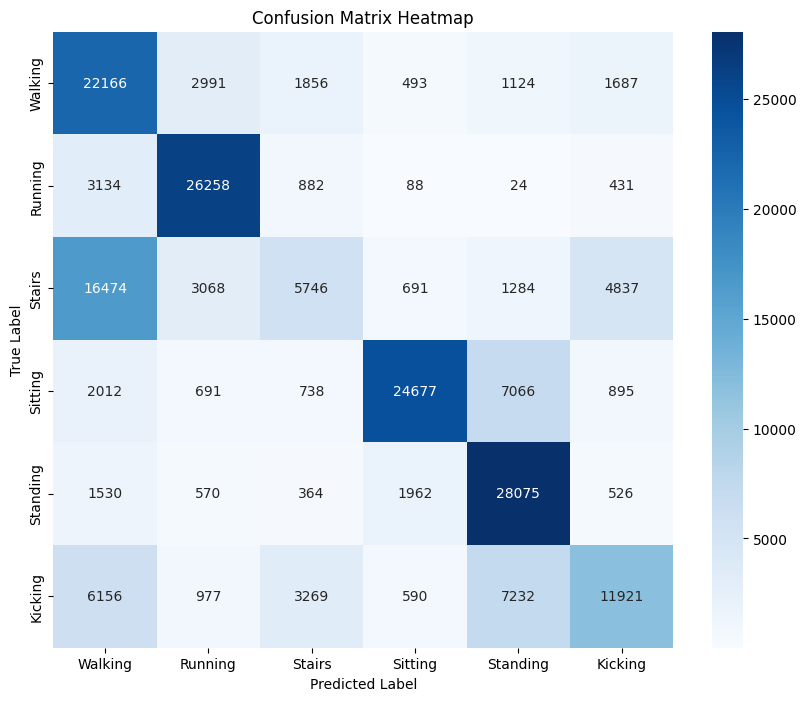

In [62]:
print('Confusion Matrix: ')
cm = confusion_matrix(y_test,predictionsNB)
print(cm)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=label_names, 
            yticklabels=label_names)

plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix Heatmap')
plt.show()

confusion matrix DT

Confusion Matrix: 
[[21651  3276  3254   539   184  1413]
 [  873 27557  1732   210    49   396]
 [ 1666  1315 26300   762   225  1832]
 [  230   355   915 31402  2547   630]
 [  150    47   287  1289 30376   878]
 [ 1588   290  2486   433  1114 24234]]


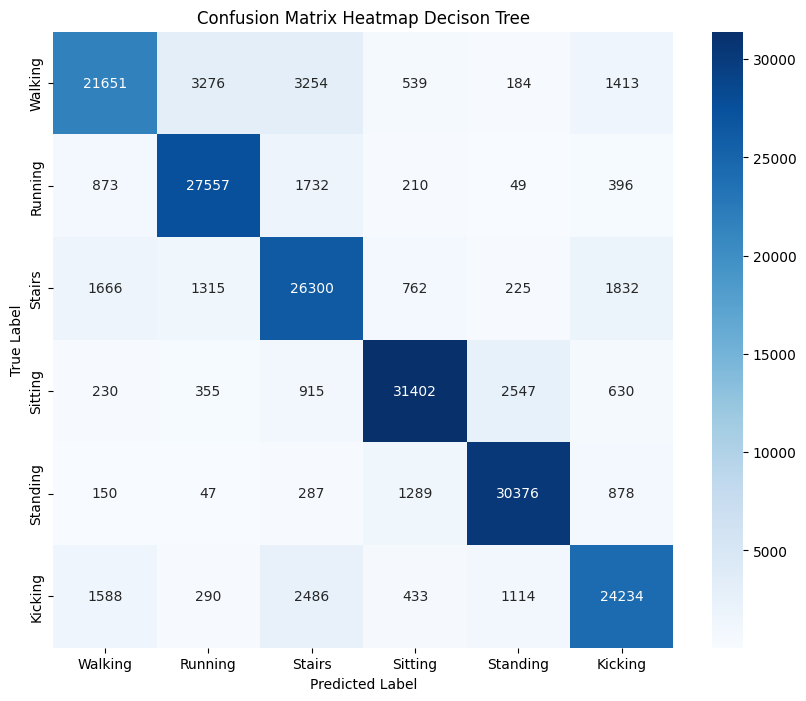

              precision    recall  f1-score   support

     Walking       0.83      0.71      0.77     30317
     Running       0.84      0.89      0.87     30817
      Stairs       0.75      0.82      0.78     32100
     Sitting       0.91      0.87      0.89     36079
    Standing       0.88      0.92      0.90     33027
     Kicking       0.82      0.80      0.81     30145

    accuracy                           0.84    192485
   macro avg       0.84      0.84      0.84    192485
weighted avg       0.84      0.84      0.84    192485



In [63]:

label_names = ['Walking', 'Running', 'Stairs', 'Sitting', 'Standing', 'Kicking']

print('Confusion Matrix: ')
cm = confusion_matrix(y_test,predictionsDT)
print(cm)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=label_names, 
            yticklabels=label_names)

plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix Heatmap Decison Tree')
plt.show()
print(classification_report(y_test, predictionsDT,target_names=label_names))

confusion Matrix kNN

Confusion Matrix: 
[[16832 11028   126  1617     0   714]
 [ 1820 26237     0     0  1686  1074]
 [ 1450   336 27676   720     0  1918]
 [    0   610   902 21588 12265   714]
 [    0     0   714   108 32205     0]
 [  730   714   720  1322   714 25945]]


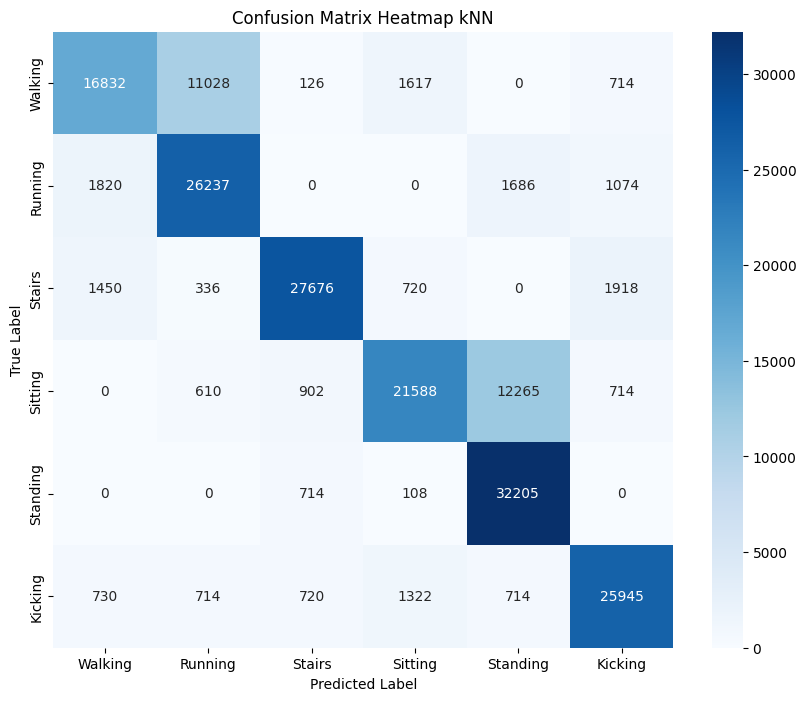

In [64]:
# confusion matrix for kNN feature= neighbors=10

print('Confusion Matrix: ')
cm = confusion_matrix(y_test,predictionskNN)
print(cm)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=label_names, 
            yticklabels=label_names)

plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix Heatmap kNN')
plt.show()

feature importance


In [ ]:
# visualize all features
plt.figure(figsize=(12, 8))
plt.barh(imps['Feature'], imps['Importance'], color='steelblue')
plt.xlabel('Importance')
plt.title('Feature Importance 56/56')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest importance at the top
plt.grid(axis='x')
plt.show()

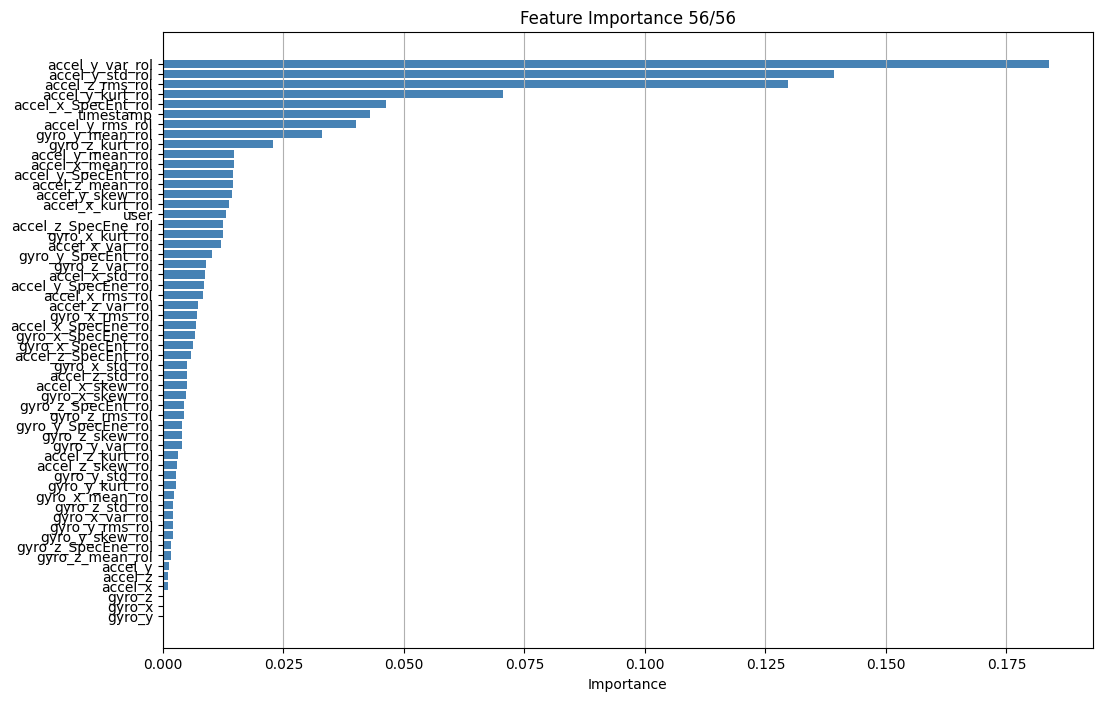

In [75]:
# visualize all features
plt.figure(figsize=(12, 8))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='steelblue')
plt.xlabel('Importance')
plt.title('Feature Importance 56/56')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest importance at the top
plt.grid(axis='x')
plt.show()

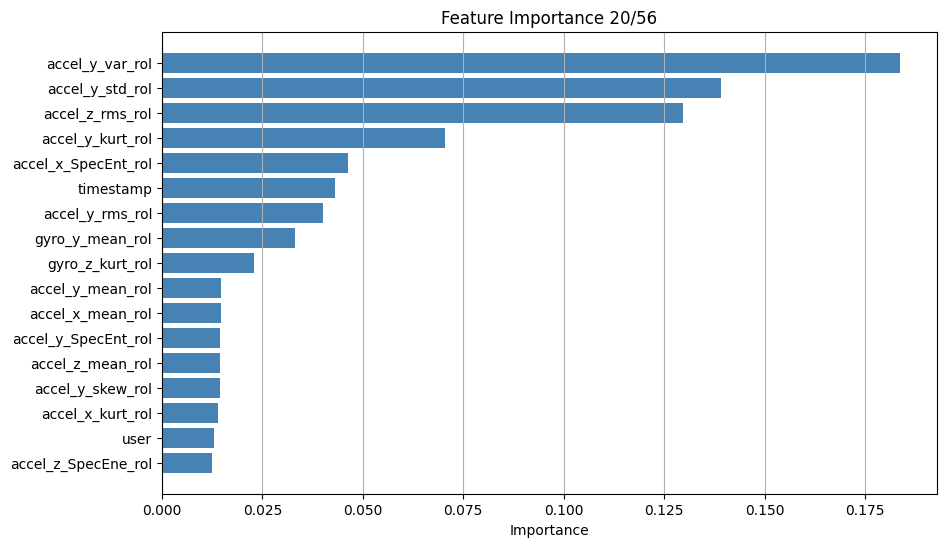

In [76]:
# visualize Top 16 features
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'][:17], importance_df['Importance'][:17], color='steelblue')
plt.xlabel('Importance')
plt.title('Feature Importance 20/56')
plt.gca().invert_yaxis()                                                                                # Invert y-axis to have the highest importance at the top
plt.grid(axis='x')
                                                                                                        # Add a vertical line between feature[:3] and feature[:4]
#plt.axhline(y=3.5, color='orange', linewidth=2, linestyle='--')
#plt.axhline(y=8.5, color='orange', linewidth=2, linestyle='--')

plt.show()

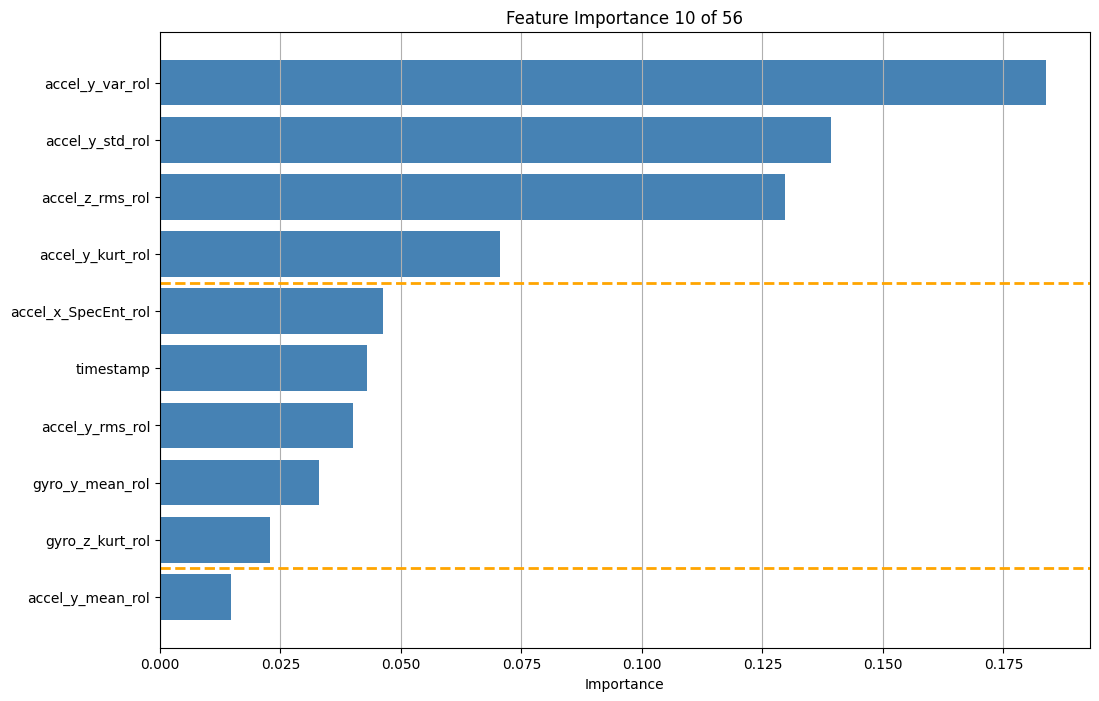

In [77]:
# visualize 10 features
plt.figure(figsize=(12, 8))
plt.barh(importance_df['Feature'][:10], importance_df['Importance'][:10], color='steelblue')
plt.xlabel('Importance')
plt.title('Feature Importance 10 of 56')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest importance at the top
plt.grid(axis='x')


plt.axhline(y=3.5, color='orange', linewidth=2, linestyle='--')
plt.axhline(y=8.5, color='orange', linewidth=2, linestyle='--')
plt.show()